<a href="https://colab.research.google.com/github/vatsalSingh123/p-117/blob/main/project_solution_C117_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll be using the banks notes data.

In [ ]:

#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


checking the data

In [ ]:
import pandas as pd

df = pd.read_csv("BankNote_Authentication.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


defining the features and the target variables and then splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split 

#Defining features and target variable
y = df['class'] #target variable we want to predict 
X = df[['variance','skewness','curtosis','entropy']] #set of required features, in this case all

#Splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

now we'll make some predictions .

In [ ]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix


LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 

y_prediction = LR.predict(X_test) #prediction

#creating the lists of the data
predicted_values = []
for i in y_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in y_test:
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")
    
    

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

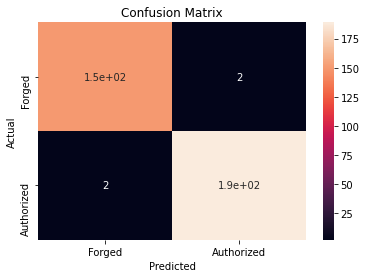

In [ ]:
labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values, labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)


extracting the true positives and true negatives

In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  189
False Positives:  2
False Negatives:  2
True Positives:  150


Finding the accuracy of the model

In [ ]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy: ",(Accuracy))

Accuracy:  98.83381924198251
